# torch 常用API

In [11]:
from pprint import pprint as p
import torch

In [12]:
x = torch.randn((1, 3, 4), dtype = torch.float32)
y = torch.zeros_like(x)
p(x)
p(y)

tensor([[[-0.8547, -0.7618,  0.6191, -0.8608],
         [-1.5445,  3.1491, -2.4543, -1.0007],
         [ 0.8767, -0.6083,  1.2671,  0.7904]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


## torch.eye(x, y)

其中x是行，y是列

In [13]:
_ = torch.eye(3, dtype = torch.float32)
_local = torch.eye(4, 3)
p(_)
p(_local)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]])


## torch.unsqueeze(x: Tensor, dim: [int | tuple]), torch.squeeze(x: Tensor, dim: [int | tuple, optional] )

if dim given, the input will be squeezed only in the specified dimensions.

默认而言，squeeze是全部维度


In [16]:
import torch

x = torch.randn((1, 3, 4), dtype = torch.float32)

# TypeError: unsqueeze() missing 1 required positional arguments: "dim"
# p(torch.unsqueeze(x).shape)
p(torch.unsqueeze(x, dim = 2).shape)
p(torch.squeeze(x).shape)

torch.Size([1, 3, 1, 4])
torch.Size([3, 4])


## torch.max(input: Tensor ,dim: int, keepdim: bool )

其中，dim表示要降低的维度，keepdim表示是否要降低维度

In [17]:
import torch

x = torch.randn((1, 3, 4), dtype = torch.float32)

p(x.shape)
p(torch.max(x, 2))
p("===========")
p(torch.max(x, 2, keepdim = True))

torch.Size([1, 3, 4])
torch.return_types.max(
values=tensor([[0.9279, 1.1711, 1.3646]]),
indices=tensor([[1, 1, 0]]))
'==========='
torch.return_types.max(
values=tensor([[[0.9279],
         [1.1711],
         [1.3646]]]),
indices=tensor([[[1],
         [1],
         [0]]]))


# nn.BatchNorm1d(4) 4是通道数，位于倒数第二维, 或者倒数第一维。如果，（1, channel) 会报错,原因在于多个batch才能计算mean和std。
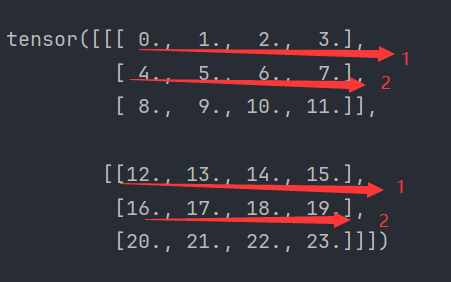

In [18]:
# x = torch.randn((1, 1024))
# net = torch.nn.BatchNorm1d(1024)
# net(x)
import torch

"""
具体的操作顺序是(2, 1, 4) ，沿着通道数把全部batch的特征都进行归一化
"""

x = torch.arange(24, dtype = torch.float32).reshape(2, 3, 4)
print(x)
net = torch.nn.BatchNorm1d(3)
net(x)


tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])


tensor([[[-1.2288, -1.0650, -0.9012, -0.7373],
         [-1.2288, -1.0650, -0.9012, -0.7373],
         [-1.2288, -1.0650, -0.9012, -0.7373]],

        [[ 0.7373,  0.9012,  1.0650,  1.2288],
         [ 0.7373,  0.9012,  1.0650,  1.2288],
         [ 0.7373,  0.9012,  1.0650,  1.2288]]],
       grad_fn=<NativeBatchNormBackward0>)

# nn.Embedding 嵌入层
## 原理
nn.Embedding是一个简单的从索引到固定大小向量表示的映射。它被用作词嵌入模型，将单词（离散）转换成连续的低维度表示（密集）。

nn.embedding可以将离散特征映射到连续空间中，从而使其可以用于进一步的计算。具体来说，nn.embedding将离散特征的索引映射到一个低维度的词向量中，每个词向量都有相同的维度。

在nn.embedding的内部，有一个矩阵（也称为词嵌入矩阵），其中每一行表示一个词的词向量表示，每一列代表不同的词向量维度。当输入一个索引时，该索引将被映射到该索引所在的行，然后返回相应的词向量。

In [10]:
import torch

net = torch.nn.Embedding(100, 24)
print(net(torch.zeros(2, 100, dtype = torch.long)).shape)



torch.Size([2, 100, 24])


# nn.LayerNorm 
## 参数是 [想要layernorm的tensor的batch之后的shape] 
具体的操作是 (1, 想要layernorm的tensor的batch之后的shape)

In [9]:
x = torch.arange(24, dtype = torch.float32).reshape(2, 3, 4)
print(x)
net = torch.nn.LayerNorm([3, 4])
net(x)


tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])


tensor([[[-1.5933, -1.3036, -1.0139, -0.7242],
         [-0.4345, -0.1448,  0.1448,  0.4345],
         [ 0.7242,  1.0139,  1.3036,  1.5933]],

        [[-1.5933, -1.3036, -1.0139, -0.7242],
         [-0.4345, -0.1448,  0.1448,  0.4345],
         [ 0.7242,  1.0139,  1.3036,  1.5933]]],
       grad_fn=<NativeLayerNormBackward0>)